In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:



# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,  # Increased verbosity for more feedback
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the model
random_search.fit(X_train_c, y_train_c)

# Extract the best model
best_rf = random_search.best_estimator_

# Evaluate on test set
best_preds = best_rf.predict(X_test_c)
rmse = np.sqrt(mean_squared_error(y_test_c, best_preds))
r2 = r2_score(y_test_c, best_preds)

print("Best Parameters (City Day):", random_search.best_params_)
print("Tuned RMSE:", rmse)
print("Tuned R² Score:", r2)


In [3]:
# Load datasets
city_day = pd.read_csv('city_day.csv')
station_day = pd.read_csv('station_day.csv')

In [5]:
def clean_encode(df):
    df = df.drop(['Date'], axis=1, errors='ignore')  # Drop 'Date' if present
    df = df.dropna()  # Drop rows with any missing values
    
    # Encode categorical features
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    
    return df

# Clean both datasets
city_day_cleaned = clean_encode(city_day)
station_day_cleaned = clean_encode(station_day)


In [7]:
def prepare_data(df):
    X = df.drop(['AQI'], axis=1)
    y = df['AQI']
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = prepare_data(city_day_cleaned)
X_train_s, X_test_s, y_train_s, y_test_s = prepare_data(station_day_cleaned)


In [9]:
def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- {dataset_name} ---")

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)
    print("Linear Regression:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
    print("R² Score:", r2_score(y_test, lr_preds))

    # Random Forest Regressor (default)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    print("\nRandom Forest:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
    print("R² Score:", r2_score(y_test, rf_preds))

# Run on both datasets
train_and_evaluate(X_train_c, X_test_c, y_train_c, y_test_c, 'City Day Dataset')
train_and_evaluate(X_train_s, X_test_s, y_train_s, y_test_s, 'Station Day Dataset')



--- City Day Dataset ---
Linear Regression:
RMSE: 25.541232130244545
R² Score: 0.9215939859601053

Random Forest:
RMSE: 15.060328072477075
R² Score: 0.972739453823177

--- Station Day Dataset ---
Linear Regression:
RMSE: 23.384495250742596
R² Score: 0.8979649106088506

Random Forest:
RMSE: 13.831204425164964
R² Score: 0.9643044934467929


# hyperparameter tunning for city_day 

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [66]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)


In [68]:
# Fit the model
random_search.fit(X_train_c, y_train_c)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [70]:
# Extract best model
best_rf = random_search.best_estimator_

# Predict and evaluate
best_preds = best_rf.predict(X_test_c)
rmse = np.sqrt(mean_squared_error(y_test_c, best_preds))
r2 = r2_score(y_test_c, best_preds)

In [72]:
print(" Best Parameters:", random_search.best_params_)
print(" Tuned RMSE:", rmse)
print(" Tuned R² Score:", r2)

 Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
 Tuned RMSE: 15.402934047095798
 Tuned R² Score: 0.9714850509869399


In [74]:
import pickle

# Save the best model to a .pkl file
with open("city_day_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print(" Model saved successfully as 'city_day_rf_model.pkl'")


 Model saved successfully as 'city_day_rf_model.pkl'


# hyperparameter tuning for station_day

In [76]:
# Random forest and param grid
rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [78]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

In [80]:
# Fit on station_day data
random_search.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=1)

In [82]:
# Evaluate
best_rf = random_search.best_estimator_
preds = best_rf.predict(X_test_s)
print("Best Parameters (Station Day):", random_search.best_params_)
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test_s, preds)))
print("Tuned R² Score:", r2_score(y_test_s, preds))

Best Parameters (Station Day): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Tuned RMSE: 13.459560569947959
Tuned R² Score: 0.9661969948715358


In [84]:
# Save model
with open("station_day_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("Model saved as 'station_day_rf_model.pkl'")

Model saved as 'station_day_rf_model.pkl'


# Feature Importance - Random Forest (City Day)

In [35]:
import matplotlib.pyplot as plt

In [37]:
# Use the best model (from tuning or default)
model = best_rf  # or rf if you prefer default

In [39]:
# Get importances
importances = model.feature_importances_
feature_names = X_train_c.columns

In [41]:
# Sort
indices = np.argsort(importances)[::-1]

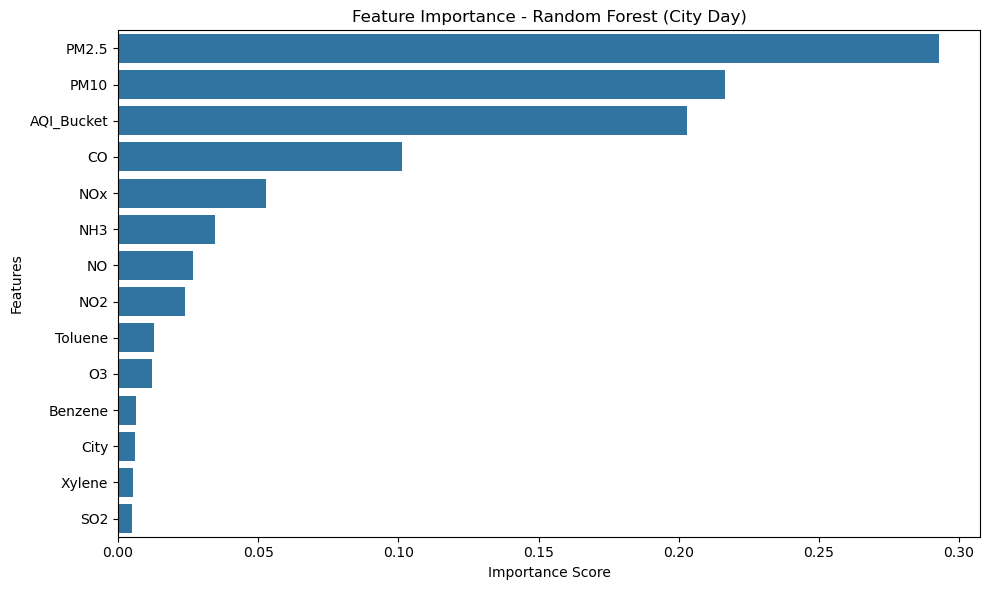

In [43]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance - Random Forest (City Day)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Feature Importance - Random Forest (Station Day)

In [48]:
# Use best tuned model
model_station = best_rf_station

In [50]:
# Feature importance
importances = model_station.feature_importances_
feature_names = X_train_s.columns

In [52]:
# Sort
indices = np.argsort(importances)[::-1]

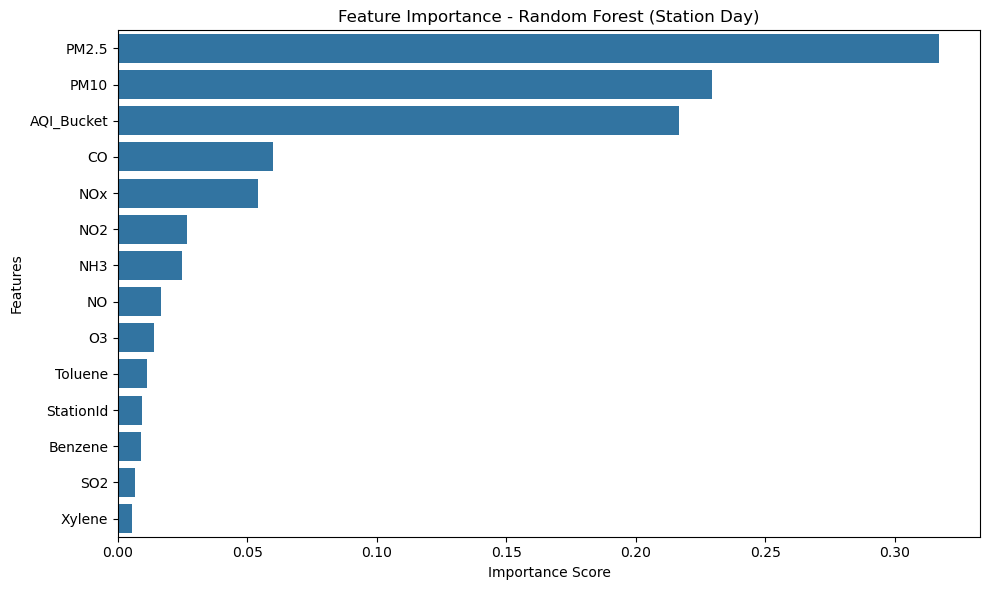

In [54]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance - Random Forest (Station Day)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# saving the models

In [58]:
import joblib

# Save city_day model
joblib.dump(best_rf, 'city_day_rf_model.pkl')

# Save station_day model
joblib.dump(best_rf_station, 'station_day_rf_model.pkl')

print(" Models saved successfully.")

 Models saved successfully.


In [60]:
import pickle

# Suppose this is your trained model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the actual model (not predictions!)
with open("city_day_rf_model.pkl", "wb") as f:
    pickle.dump(model, f)


NameError: name 'X_train' is not defined